In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {
    'weight':[180,200,150,170,160,140],
    'sweetness':[7,6,4,5,6,3],
    'label':['Apple','Apple','Orange','Orange','Apple','Orange']
}

In [4]:
dataset = pd.DataFrame(data)

In [5]:
dataset

,weight,sweetness,label
0,180,7,Apple
1,200,6,Apple
2,150,4,Orange
3,170,5,Orange
4,160,6,Apple
5,140,3,Orange


In [6]:
data = [  
#  weight,sweetness,label          
    (180, 7, 'Apple'),
    (200, 6, 'Apple'),
    (150, 4, 'Orange'),
    (170, 5, 'Orange'),
    (160, 6, 'Apple'),
    (140, 3, 'Orange')
]

In [7]:
new_fruit = (165,5.5)

In [8]:
def euclidean_distance(x,y):
    return np.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) **2 )

In [9]:
def manhattan_distance(x,y):
    return sum(abs(a-b) for a , b in zip (x,y))

In [10]:
def minkowski_distance(x,y,p):
    return sum(abs(a-b)**p for a , b in zip(x,y)) ** (1/p)

In [11]:
#Testing 

point1 = (1, 2, 3)
point2 = (4, 0, -1)

distance1 = minkowski_distance(point1, point2,p=3)
distance2 = manhattan_distance(point1, point2)
distance3 = euclidean_distance(point1, point2)

print(f"Minkowski Distance: {distance1}")
print(f"Manhattan Distance: {distance2}")
print(f"Euclidean Distance: {distance3}")

Minkowski Distance: 4.626065009182741
Manhattan Distance: 9
Euclidean Distance: 3.605551275463989


In [12]:
def knn_classify(new_fruit,data,k):
    distances = []
    for weight,sweetness,label in data:
        dist = euclidean_distance(new_fruit,(weight,sweetness))
        distances.append((dist,label))
        
    distances.sort(key = lambda x:x[0])
    nearest_neighbors = distances[:k]
    
    vote_count = {}
    
    for neighbor in nearest_neighbors:
        label = neighbor[1]
        if label in vote_count:
            vote_count[label] += 1
        else:
            vote_count[label] = 1
            
    predicted_label = max(vote_count , key = vote_count.get)
    return predicted_label

In [13]:
print("\t Output \n")
for k in [1,2,3]:
    predicted_label123 = knn_classify(new_fruit,data,k)
    print(f"Fruit Predicted For k = {k} is {predicted_label123}.")

	 Output 

Fruit Predicted For k = 1 is Orange.
Fruit Predicted For k = 2 is Orange.
Fruit Predicted For k = 3 is Apple.


<Figure size 640x480 with 0 Axes>

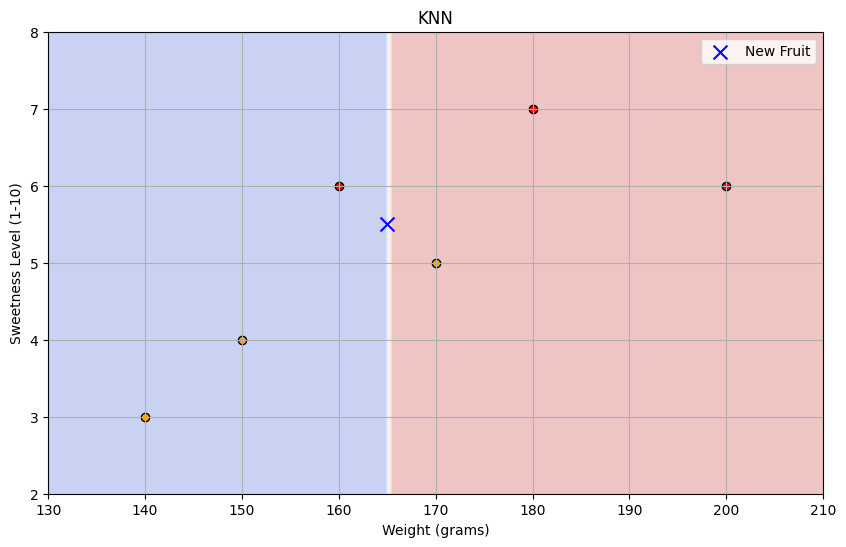

In [15]:
# Set up the plot
plt.figure()

# Create a grid for the decision boundary
x_min, x_max = 130, 210  # Broad range for weights
y_min, y_max = 2, 8      # Broad range for sweetness
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Classify each point in the grid using k-NN
Z = np.array([
    1 if knn_classify((x, y), data, k) == 'Apple' else 0
    for x, y in zip(xx.ravel(), yy.ravel())
]).reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
                
# Plot each data point with a legend
for weight, sweetness, label in data:
    color = 'red' if label == "Apple" else 'orange'
    plt.scatter(weight, sweetness, color=color, edgecolor='black')
    
# Plot the new fruit point
plt.scatter(new_fruit[0], new_fruit[1], color='blue', marker='x', s=100, label='New Fruit')

plt.title('KNN')
plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level (1-10)')
plt.grid()


plt.legend()  

plt.show()
